<a href="https://colab.research.google.com/github/AhirtonLopes/Transfer_Learning_GANs/blob/master/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementações de GANs padrão usando camadas totalmente conectadas e a biblioteca Keras (Dataset MNIST - Dígitos Manuscritos)

- Dados

Redimensionando as imagens MNIST entre -1 e 1.

- Gerador

Rede neural simples totalmente conectada, ativação LeakyReLU e BatchNormalization.

A entrada para o gerador é chamada de 'amostra latente' (100 valores), que é uma série de números gerados aleatoriamente, e produz 784 (= 28x28) pontos de dados que representam uma imagem de dígito. Utilizaremos a distribuição normal.

A última ativação é tanh.

- Discriminador

Rede neural simples totalmente conectada e ativação LeakyReLU.

A última ativação é sigmóide.

- Perda

binary_crossentropy

- Otimizador

Adam (lr = 0,0002, beta_1 = 0,5) batch_size = 64 épocas = 100



In [0]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras import initializers

In [0]:
# Carregando nosso dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

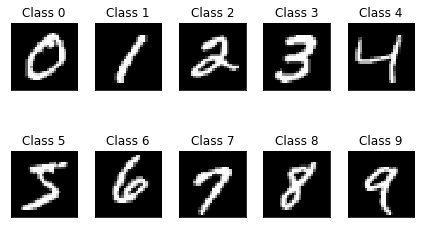

In [17]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [18]:
print('X_train.shape', X_train.shape)

# reshaping the inputs

X_train = X_train.reshape(60000, 28*28)

# normalizing the inputs (-1, 1)

X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [0]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))


In [20]:
# prints a summary representation of your model
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
__________

In [0]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [22]:
# prints a summary representation of your model
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 513       
Total para

In [0]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [0]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [25]:
# prints a summary representation of your model
d_g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 784)               583312    
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 265601    
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


epoch = 1/50, d_loss=0.582, g_loss=1.545                                                                                                     


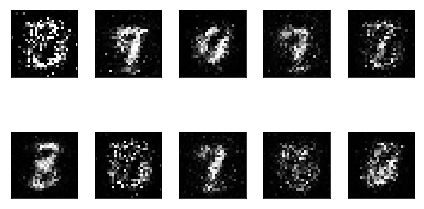

epoch = 2/50, d_loss=0.543, g_loss=1.741                                                                                                     
epoch = 3/50, d_loss=0.567, g_loss=1.522                                                                                                     
epoch = 4/50, d_loss=0.560, g_loss=1.334                                                                                                     
epoch = 5/50, d_loss=0.541, g_loss=1.333                                                                                                     
epoch = 6/50, d_loss=0.561, g_loss=1.286                                                                                                     
epoch = 7/50, d_loss=0.617, g_loss=1.253                                                                                                     
epoch = 8/50, d_loss=0.568, g_loss=1.197                                                                                                     
epoch 

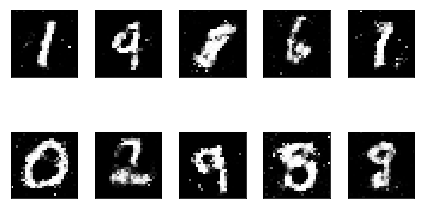

epoch = 12/50, d_loss=0.643, g_loss=1.094                                                                                                     
epoch = 13/50, d_loss=0.662, g_loss=1.013                                                                                                     
epoch = 14/50, d_loss=0.651, g_loss=1.041                                                                                                     
epoch = 15/50, d_loss=0.619, g_loss=1.055                                                                                                     


In [0]:
epochs = 50
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

In [0]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()